<a href="https://colab.research.google.com/github/avimistry-3/IMDB-Sentiment-Analysis/blob/main/IMDB_review_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wordcloud

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
from google.colab import files
files.upload()



Saving kaggle.json to kaggle (1).json


In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [7]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
  0% 0.00/25.7M [00:00<?, ?B/s]
100% 25.7M/25.7M [00:00<00:00, 1.10GB/s]


In [8]:
!unzip imdb-dataset-of-50k-movie-reviews.zip -d imdb_data

Archive:  imdb-dataset-of-50k-movie-reviews.zip
  inflating: imdb_data/IMDB Dataset.csv  


In [9]:
import pandas as pd

df = pd.read_csv("imdb_data/IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [11]:
#clean and process text
def clean_text(text):
    text = text.lower()
    text = re.sub(r"<.*?>", "", text)       # remove HTML tags
    text = re.sub(r"http\S+", "", text)     # remove URLs
    text = re.sub(r"[^a-z\s]", "", text)    # keep only letters
    text = text.strip()
    return text

df['cleaned_review'] = df['review'].apply(clean_text)
df.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...


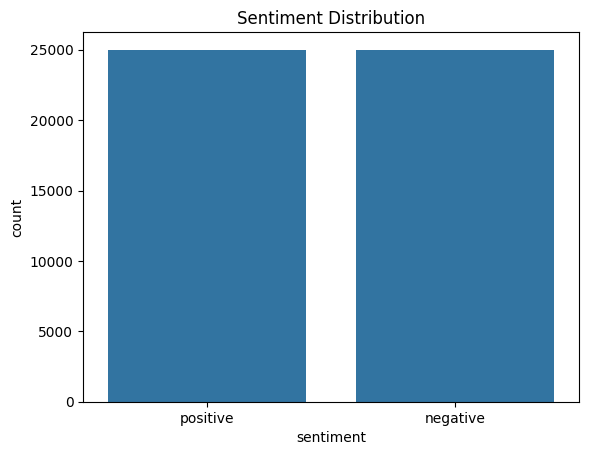

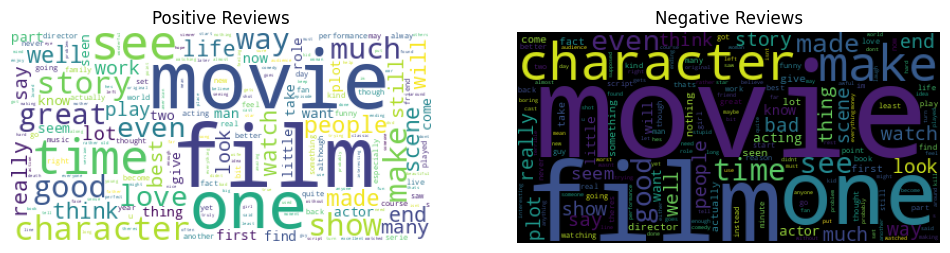

In [12]:
# Sentiment distribution
sns.countplot(x="sentiment", data=df)
plt.title("Sentiment Distribution")
plt.show()

# Word clouds
pos_text = " ".join(df[df.sentiment=="positive"]["cleaned_review"])
neg_text = " ".join(df[df.sentiment=="negative"]["cleaned_review"])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(WordCloud(background_color="white").generate(pos_text))
plt.title("Positive Reviews")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(WordCloud(background_color="black").generate(neg_text))
plt.title("Negative Reviews")
plt.axis("off")
plt.show()

In [13]:
#Train-test split
X = df['cleaned_review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [14]:
#Vectorization
tfidf = TfidfVectorizer(max_features=20000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)


              precision    recall  f1-score   support

    negative       0.91      0.89      0.90      5000
    positive       0.90      0.91      0.90      5000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



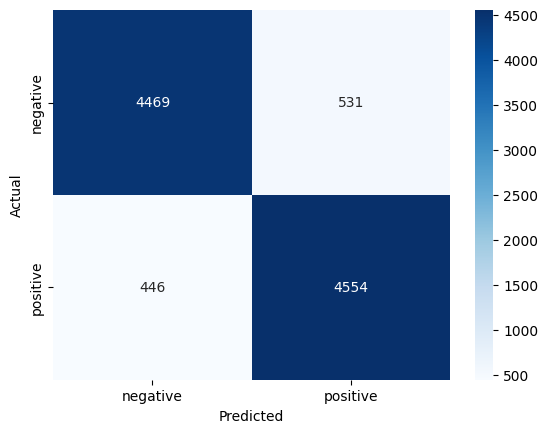

In [19]:

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [20]:
samples = [
    "This movie was amazing! Best film I've seen.",
    "Worst movie ever. Completely boring and bad acting.",
    "It was okay, not great but not terrible."
]

samples_clean = [clean_text(s) for s in samples]
samples_tfidf = tfidf.transform(samples_clean)
preds = model.predict(samples_tfidf)

for review, sentiment in zip(samples, preds):
    print(f"Review: {review}\nPredicted Sentiment: {sentiment}\n")

Review: This movie was amazing! Best film I've seen.
Predicted Sentiment: positive

Review: Worst movie ever. Completely boring and bad acting.
Predicted Sentiment: negative

Review: It was okay, not great but not terrible.
Predicted Sentiment: negative

